In [36]:
import pandas as pd
import numpy as np
import os
from tool_Visualize import move_random, count_files
import seaborn as sns
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import random

In [68]:
count_files("tomato/test")

                                        Category  File Count
0                        Tomato___Bacterial_spot         100
1                          Tomato___Early_blight         100
2                               Tomato___healthy         100
3                           Tomato___Late_blight         100
4                             Tomato___Leaf_Mold         100
5                    Tomato___Septoria_leaf_spot         100
6  Tomato___Spider_mites Two-spotted_spider_mite         100
7                           Tomato___Target_Spot         100
8                   Tomato___Tomato_mosaic_virus         100
9         Tomato___Tomato_Yellow_Leaf_Curl_Virus         100


In [28]:
train_path = 'tomato/train'
val_path = 'tomato/val'
test_path = 'tomato/test'
train_aug_path = "tomato/train_aug"

In [45]:
def calculate_average_brightness(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is not None:
        return np.mean(image)
    else:
        return None

def get_random_images(directory, num_images=2000):
    all_images = []
    
    for category in os.listdir(directory):
        category_path = os.path.join(directory, category)
        if os.path.isdir(category_path):
            for file_name in os.listdir(category_path):
                file_path = os.path.join(category_path, file_name)
                # Kiểm tra định dạng file hình ảnh
                if file_name.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff')):
                    all_images.append(file_path)
    
    # Chọn ngẫu nhiên 2000 tấm hình từ danh sách
    random_images = random.sample(all_images, min(num_images, len(all_images)))
    return random_images

def get_average_brightness_distribution(image_paths):
    brightness_values = []
    for image_path in image_paths:
        brightness = calculate_average_brightness(image_path)
        if brightness is not None:
            brightness_values.append(brightness)
    return brightness_values

In [65]:
random_images = get_random_images(train_aug_path, num_images=5000)

# Tính độ sáng trung bình của các tấm hình đã chọn
train_aug_brightness = get_average_brightness_distribution(random_images)


In [30]:
test_brightness = get_average_brightness_distribution(test_path)
val_brightness = get_average_brightness_distribution(val_path)


C:\Users\namtr\AppData\Local\Temp\ipykernel_9576\3710195546.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_aug_brightness, shade=True, label='train', color='blue')
C:\Users\namtr\AppData\Local\Temp\ipykernel_9576\3710195546.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(val_brightness, shade=True, label='val', color='orange')


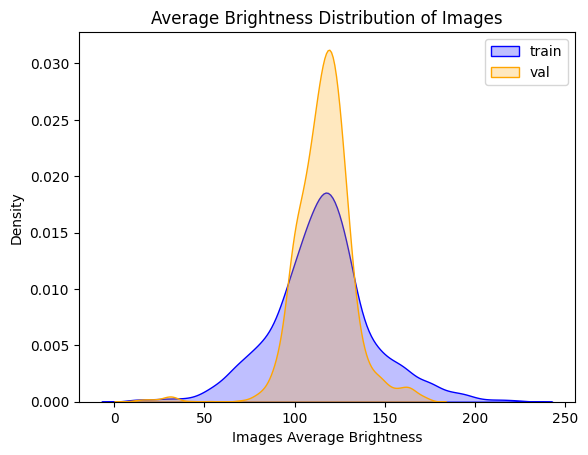

In [66]:
sns.kdeplot(train_aug_brightness, shade=True, label='train', color='blue')
sns.kdeplot(val_brightness, shade=True, label='val', color='orange')
plt.title('Average Brightness Distribution of Images')
plt.xlabel('Images Average Brightness')
plt.ylabel('Density')
plt.legend()
plt.show()

C:\Users\namtr\AppData\Local\Temp\ipykernel_9576\1240414518.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_aug_brightness, shade=True, label='train', color='blue')
C:\Users\namtr\AppData\Local\Temp\ipykernel_9576\1240414518.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_brightness, shade=True, label='test', color='orange')


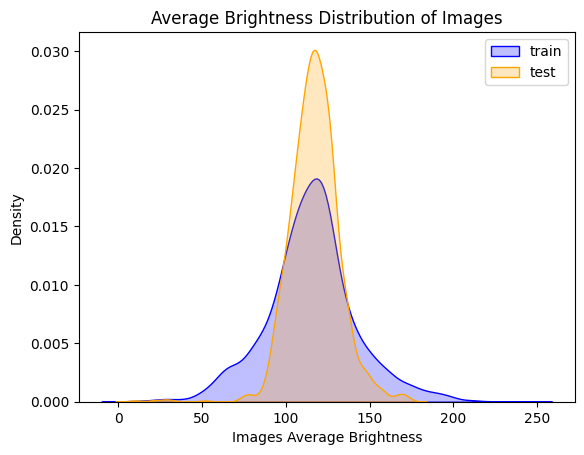

In [61]:
sns.kdeplot(train_aug_brightness, shade=True, label='train', color='blue')
sns.kdeplot(test_brightness, shade=True, label='test', color='orange')
plt.title('Average Brightness Distribution of Images')
plt.xlabel('Images Average Brightness')
plt.ylabel('Density')
plt.legend()
plt.show()

In [67]:
import cv2
import os
import numpy as np

def calculate_average_brightness(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is not None:
        return np.mean(image)
    else:
        return None

def analyze_test_data(directory):
    total_images = 0
    brightness_values = []
    category_counts = {}
    
    for category in os.listdir(directory):
        category_path = os.path.join(directory, category)
        if os.path.isdir(category_path):
            category_counts[category] = 0
            for file_name in os.listdir(category_path):
                file_path = os.path.join(category_path, file_name)
                if file_name.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff')):
                    total_images += 1
                    category_counts[category] += 1
                    brightness = calculate_average_brightness(file_path)
                    if brightness is not None:
                        brightness_values.append(brightness)
    
    average_brightness = np.mean(brightness_values) if brightness_values else 0
    return total_images, category_counts, average_brightness

# Đường dẫn tới thư mục test
test_folder_path = "tomato/test"

# Phân tích dữ liệu test
total_images, category_counts, average_brightness = analyze_test_data(test_folder_path)

# Hiển thị thông tin
print(f"Total images: {total_images}")
print(f"Category counts: {category_counts}")
print(f"Average brightness: {average_brightness}")


Total images: 1000
Category counts: {'Tomato___Bacterial_spot': 100, 'Tomato___Early_blight': 100, 'Tomato___healthy': 100, 'Tomato___Late_blight': 100, 'Tomato___Leaf_Mold': 100, 'Tomato___Septoria_leaf_spot': 100, 'Tomato___Spider_mites Two-spotted_spider_mite': 100, 'Tomato___Target_Spot': 100, 'Tomato___Tomato_mosaic_virus': 100, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 100}
Average brightness: 116.9555577999208


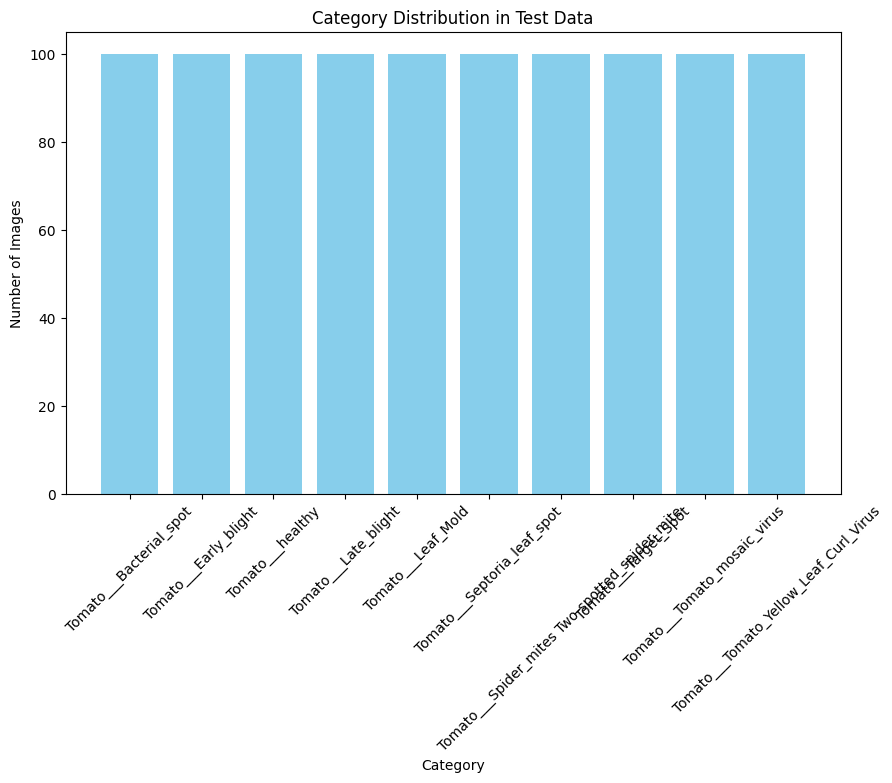

In [76]:
def plot_category_distribution(category_counts):
    categories = list(category_counts.keys())
    counts = list(category_counts.values())
    
    plt.figure(figsize=(10, 6))
    plt.bar(categories, counts, color='skyblue')
    plt.xlabel('Category')
    plt.ylabel('Number of Images')
    plt.title('Category Distribution in Test Data')
    plt.xticks(rotation=45)
    plt.show()

# Sử dụng hàm để vẽ biểu đồ
plot_category_distribution(category_counts)

In [73]:

def calculate_average_brightness(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is not None:
        return np.mean(image)
    else:
        return None

def analyze_test_data(directory):
    total_images = 0
    brightness_values = []
    category_counts = {}
    
    for category in os.listdir(directory):
        category_path = os.path.join(directory, category)
        if os.path.isdir(category_path):
            category_counts[category] = 0
            for file_name in os.listdir(category_path):
                file_path = os.path.join(category_path, file_name)
                if file_name.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff')):
                    total_images += 1
                    category_counts[category] += 1
                    brightness = calculate_average_brightness(file_path)
                    if brightness is not None:
                        brightness_values.append(brightness)
    
    average_brightness = np.mean(brightness_values) if brightness_values else 0
    return total_images, category_counts, average_brightness, brightness_values

# Đường dẫn tới thư mục test
test_folder_path = "tomato/test"

# Phân tích dữ liệu test
total_images, category_counts, average_brightness, brightness_distribution = analyze_test_data(test_folder_path)

# Hiển thị thông tin
total_images, category_counts, average_brightness, brightness_distribution[:10]  # Display first 10 brightness values for brevity


(1000,
 {'Tomato___Bacterial_spot': 100,
  'Tomato___Early_blight': 100,
  'Tomato___healthy': 100,
  'Tomato___Late_blight': 100,
  'Tomato___Leaf_Mold': 100,
  'Tomato___Septoria_leaf_spot': 100,
  'Tomato___Spider_mites Two-spotted_spider_mite': 100,
  'Tomato___Target_Spot': 100,
  'Tomato___Tomato_mosaic_virus': 100,
  'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 100},
 116.9555577999208,
 [96.38336181640625,
  103.89324951171875,
  101.09144592285156,
  104.99736022949219,
  107.30963134765625,
  105.0289306640625,
  110.51437377929688,
  99.09361267089844,
  91.33714294433594,
  102.85258483886719])

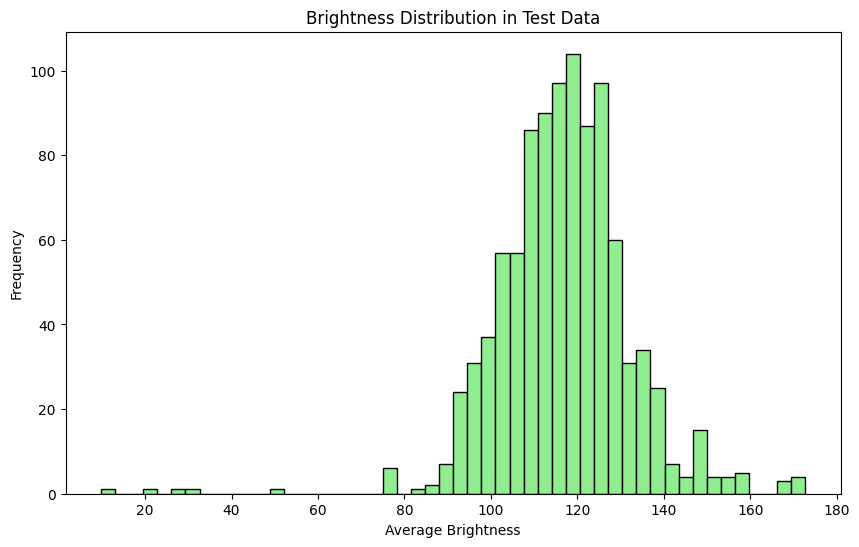

C:\Users\namtr\AppData\Local\Temp\ipykernel_9576\2566576254.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(brightness_values, shade=True, color='lightgreen')


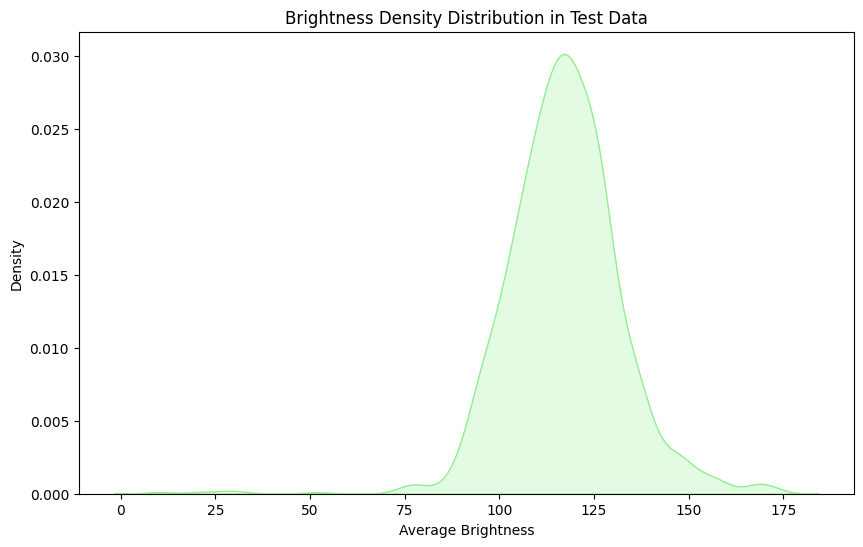

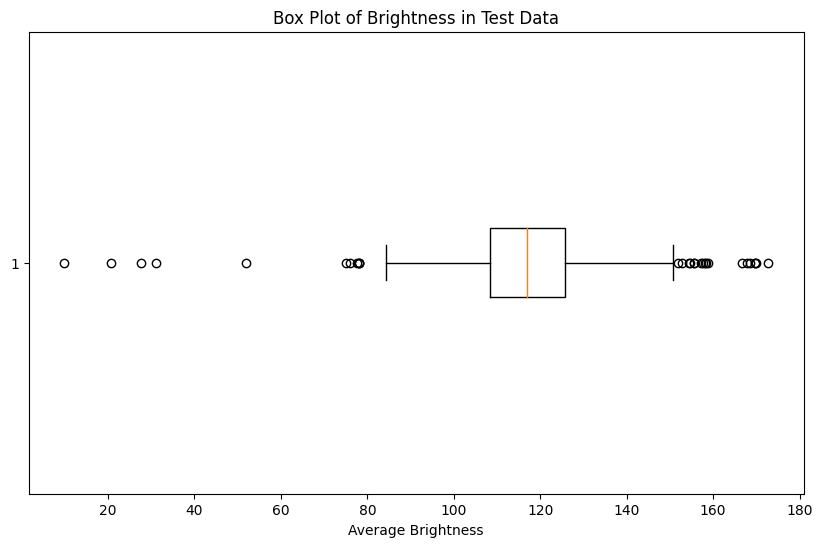

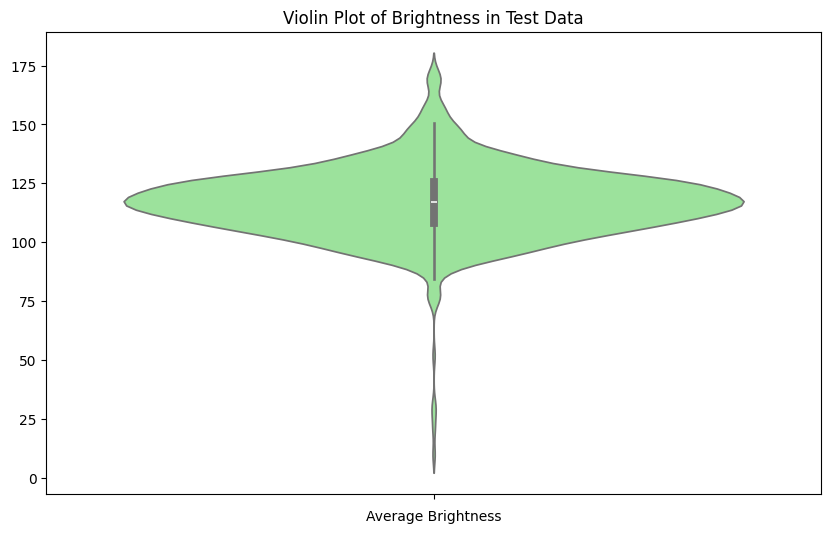

In [75]:
def plot_brightness_distribution(brightness_values, bins=30):
    plt.figure(figsize=(10, 6))
    plt.hist(brightness_values, bins=bins, color='lightgreen', edgecolor='black')
    plt.xlabel('Average Brightness')
    plt.ylabel('Frequency')
    plt.title('Brightness Distribution in Test Data')
    plt.show()

def plot_brightness_density(brightness_values):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(brightness_values, shade=True, color='lightgreen')
    plt.xlabel('Average Brightness')
    plt.ylabel('Density')
    plt.title('Brightness Density Distribution in Test Data')
    plt.show()

def plot_brightness_boxplot(brightness_values):
    plt.figure(figsize=(10, 6))
    plt.boxplot(brightness_values, vert=False)
    plt.xlabel('Average Brightness')
    plt.title('Box Plot of Brightness in Test Data')
    plt.show()

def plot_brightness_violinplot(brightness_values):
    plt.figure(figsize=(10, 6))
    sns.violinplot(brightness_values, color='lightgreen')
    plt.xlabel('Average Brightness')
    plt.title('Violin Plot of Brightness in Test Data')
    plt.show()

# Gọi hàm để vẽ các biểu đồ
plot_brightness_distribution(brightness_distribution, bins=50)
plot_brightness_density(brightness_distribution)
plot_brightness_boxplot(brightness_distribution)
plot_brightness_violinplot(brightness_distribution)